# Cuantización de Colores con K Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Recuperar la imagen

In [2]:
imagen_arreglo = mpimg.imread('palm_trees.jpg')

In [3]:
# Imagen de 1401 píxeles de alto
# con 934 píxeles de ancho y
# 3 canales (R G B) (Rojo Verde Azúl)
imagen_arreglo.shape

(1401, 934, 3)

In [4]:
#Pixel(0,0)
imagen_arreglo[0][0]

array([ 25,  89, 127], dtype=uint8)

In [5]:
#Pixel(1400,933)
imagen_arreglo[1400][933]

array([10, 10, 12], dtype=uint8)

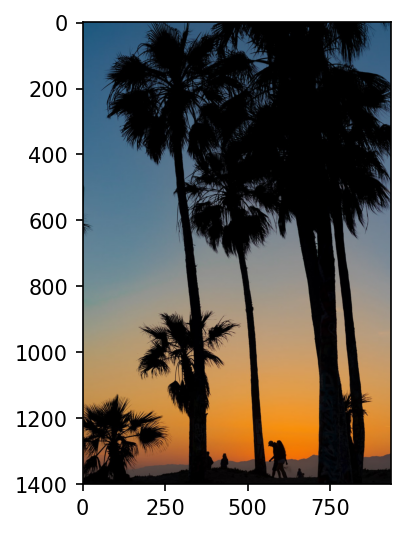

In [6]:
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(imagen_arreglo)

### Uso de K Means para la Cuantización de colores
Significa reducir el número de colores únicos a una cantidad de K colores. Para el ejemplo tomaremos un K = 5

In [7]:
# al = alto
# an = ancho
# ca = canales
(al,an,ca) = imagen_arreglo.shape

Conversión de la dimensión de la matriz de imagen de 3d a 2d usando (al,an,ca) --> (h*w,c)

In [8]:
imagen_arreglo_2d = imagen_arreglo.reshape(al*an,ca)

In [9]:
# Se tiene 1 308 534 píxeles
imagen_arreglo_2d.shape

(1308534, 3)

In [13]:
# Los 10 primeros pixeles
imagen_arreglo_2d[0:10]

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       [ 26,  88, 127],
       [ 26,  88, 127],
       [ 27,  89, 128],
       [ 27,  89, 128]], dtype=uint8)

In [14]:
from sklearn.cluster import KMeans

In [15]:
modelo = KMeans(n_clusters=5)

In [16]:
modelo.fit(imagen_arreglo_2d)

KMeans(n_clusters=5)

In [17]:
etiquetas = modelo.predict(imagen_arreglo_2d)

In [18]:
etiquetas

array([2, 2, 2, ..., 0, 0, 0])

In [19]:
# Centroides del modelo (Colores)
modelo.cluster_centers_

array([[  2.7892839 ,   2.60752718,   3.73391542],
       [156.94563028, 149.26690591, 135.47231879],
       [ 77.11619311, 113.36252505, 139.64276067],
       [213.45557927, 142.47854887,  64.72592731],
       [ 67.49049906,  62.32130225,  63.19657656]])

In [20]:
codigos_rgb = modelo.cluster_centers_.round(0).astype(int)

In [21]:
codigos_rgb

array([[  3,   3,   4],
       [157, 149, 135],
       [ 77, 113, 140],
       [213, 142,  65],
       [ 67,  62,  63]])

In [22]:
nueva_imagen = np.reshape(codigos_rgb[etiquetas],(al,an,ca))

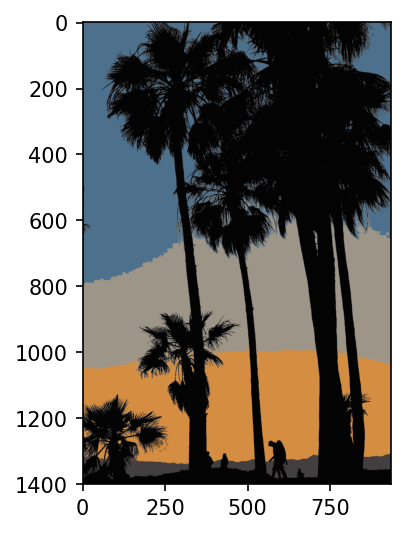

In [23]:
plt.figure(figsize=(5,4),dpi=150)
plt.imshow(nueva_imagen)

In [24]:
plt.imsave("nueva_imagen.jpg",np.uint8(nueva_imagen))